In [1]:
import pandas as pd
import numpy as np

In [2]:
sv = pd.read_csv('E:/June 10 Randomforest classifier, Ensemble, Bagging Boosting/data.csv')

In [3]:
sv.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
sv.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
sv['Gender']=sv['Gender'].replace({'Female':0, 'Male':1})

In [6]:
sv['User ID'].value_counts()

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
           ..
15727467    1
15699619    1
15697574    1
15628972    1
15730688    1
Name: User ID, Length: 400, dtype: int64

In [7]:
sv.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0


In [8]:
X = sv.iloc[:,0:4].values
Y = sv.iloc[:, 4].values

In [9]:
X

array([[15624510,        1,       19,    19000],
       [15810944,        1,       35,    20000],
       [15668575,        0,       26,    43000],
       ...,
       [15654296,        0,       50,    20000],
       [15755018,        1,       36,    33000],
       [15594041,        0,       49,    36000]], dtype=int64)

In [10]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

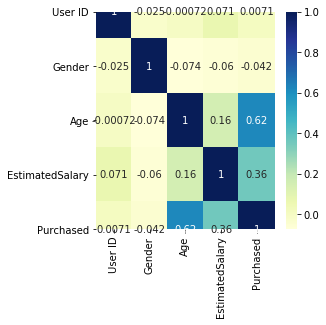

In [12]:
corrmat = sv.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
sns.heatmap(sv.corr(),cmap = 'YlGnBu', annot=True)

In [13]:
sv.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 42)

In [15]:
X_test

array([[15697424,        0,       46,    22000],
       [15609669,        0,       59,    88000],
       [15776733,        0,       28,    44000],
       [15724536,        0,       48,    96000],
       [15699284,        0,       29,    28000],
       [15798659,        0,       30,    62000],
       [15639576,        0,       47,   107000],
       [15786993,        0,       29,    83000],
       [15721592,        1,       40,    75000],
       [15610801,        1,       42,    65000],
       [15727311,        0,       35,    65000],
       [15778830,        0,       53,    34000],
       [15775562,        0,       23,    48000],
       [15595228,        0,       20,    23000],
       [15725660,        1,       30,    87000],
       [15772798,        1,       35,   108000],
       [15613014,        0,       52,    38000],
       [15596984,        0,       46,    74000],
       [15694453,        1,       39,    42000],
       [15775335,        1,       56,    60000],
       [15774179,   

In [16]:
X_train

array([[15603246,        0,       27,    57000],
       [15704583,        1,       46,    28000],
       [15735549,        0,       39,   134000],
       ...,
       [15680752,        0,       43,   133000],
       [15579212,        1,       39,    77000],
       [15584545,        0,       32,    86000]], dtype=int64)

In [17]:
Y_train

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [18]:
Y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

In [20]:
svclassifier = svclassifier.fit(X_train, Y_train)

In [21]:
y_pred = svclassifier.predict(X_train)
x_pred = svclassifier.predict(X_test)

In [22]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [23]:
print('The Training F1 Score is', f1_score(y_pred, Y_train))
print('The Testing F1 Score is', f1_score(x_pred, Y_test))
print('Training Accuracy score', accuracy_score(y_pred, Y_train))
print('Testing Accuracy score', accuracy_score(x_pred, Y_test))

The Training F1 Score is 0.6162162162162163
The Testing F1 Score is 0.5116279069767441
Training Accuracy score 0.778125
Testing Accuracy score 0.7375


In [24]:
cm = confusion_matrix(Y_test, x_pred)

In [25]:
cm

array([[48,  4],
       [17, 11]], dtype=int64)

In [26]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf']}

In [28]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
grid = grid.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.741, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.783, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.741, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.783, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.755, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1,

###### from sklearn.svm import SVC
###### svclassifier = SVC(kernel='poly')

###### svclassifier1 = svclassifier.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)

###### y_pred = svclassifier.predict(X_train)
###### x_pred = svclassifier.predict(X_test)

###### print('The Training F1 Score is', f1_score(y_pred, Y_train))
###### print('The Testing F1 Score is', f1_score(x_pred, Y_test))
###### print('Training Accuracy score', accuracy_score(y_pred, Y_train))
###### print('Testing Accuracy score', accuracy_score(x_pred, Y_test))

The Training F1 Score is 0.5287356321839081
The Testing F1 Score is 0.5185185185185185
Training Accuracy score 0.359375
Testing Accuracy score 0.35

###### cm1 = confusion_matrix(Y_test, x_pred)

###### cm1

array([[ 0, 52],
       [ 0, 28]], dtype=int64)

###### from sklearn.svm import SVC
###### svclassifier = SVC(kernel='rbf')

###### svclassifier2 = svclassifier.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)

###### y_pred = svclassifier.predict(X_train)
###### x_pred = svclassifier.predict(X_test)

###### print('The training F1 Score', f1_score(y_pred, Y_train))
###### print('The Testing F1 Score is', f1_score(x_pred, Y_test))
###### print('Training Accuracy score', accuracy_score(y_pred, Y_train))
###### print('Testing Accuracy score', accuracy_score(x_pred, Y_test))

The training F1 Score 1.0
The Testing F1 Score is 0.0
Training Accuracy score 1.0
Testing Accuracy score 0.65
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)

###### cm2 = confusion_matrix(Y_test, x_pred)

###### cm2

array([[52,  0],
       [28,  0]], dtype=int64)

###### you can see the above code are indivudually mentioned and the 3 diffierent kernels 'linear' 'poly', 'rbf'. and there metrics. among the three kernels, linear is doing better.